# In response to Stack Overflow [Question](https://stackoverflow.com/questions/72380733/development-of-a-feature-per-row-or-from-todays-date)

In [47]:
import pandas as pd
import random as rnd
import datetime

# #======= ✍**Create some data**

In [82]:
#============ Helper Function:
today = datetime.datetime.now()    # Get today's date as reference
delta = datetime.timedelta         # Used to generate random past dates

def make_date(offset):
  return (today-delta(offset)).strftime('%Y-%M-%d')


In [116]:
#=========== Setup:
N_Customers = 100                                                 # Number of customers to model
N_Samples = 1000                                                  # Number of data points
N_Years = 3                                                       # How far back should dates go
date_offsets = rnd.choices(range(0,365*N_Years),k=N_Samples)      # Used to create list of purchase dates

#=========== Generate Data:
customer = rnd.choices(range(1,N_Customers+1),k=N_Samples)        #randomly generate customer numbers
dates = [ make_date(offset) for offset in date_offsets]           #Generate random purchase dates
purchase = [1 for _ in range(N_Samples)]                          #list of all ones (1) to be used for counting


#=========== Make Dateframe:
df = pd.DataFrame.from_dict({'customer':customer,
                             'dates':dates,
                             'purchase':purchase})
df.head(5)

,customer,dates,purchase
0,73,2019-39-23,1
1,80,2020-39-26,1
2,3,2021-39-27,1
3,90,2020-39-08,1
4,15,2021-39-19,1


# #=======  📊**Visualize Total Purchases** by Customer ID

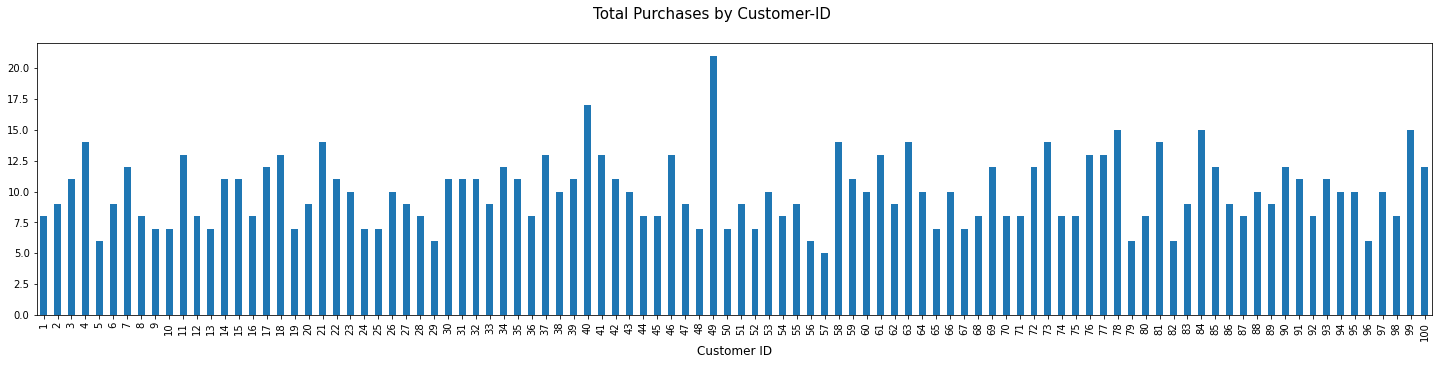

In [125]:
fig = plt.figure()
_ = df.groupby(by='customer')['purchase'].sum().plot(kind='bar',figsize=(25,5),fig=fig)
_ = fig.suptitle('Total Purchases by Customer-ID',fontsize=15)
_ = fig.axes[0].set_xlabel('Customer ID',fontsize=12)

# #======= 👟 **How to Get a Running Total:**

In [127]:
#======== Group data by Customer-ID:
gdf = df.groupby(by='customer')

#======== Use Rolling Method to Get Running Totals:
running_totals = gdf['purchase'].rolling(window=df.shape[0], min_periods=0).sum()

In [175]:
#======== Replace Column of Ones (1's) with Running Total:
for (customer,idx), running_total in running_totals.items():
  df.loc[idx,'purchase'] = running_total - 1

#======== Review Data:
df[df['customer']==42]

,customer,dates,purchase
202,42,2021-39-25,0
212,42,2021-39-06,1
301,42,2019-39-25,2
394,42,2020-39-25,3
417,42,2022-39-07,4
492,42,2019-39-18,5
561,42,2019-39-08,6
615,42,2019-39-31,7
917,42,2019-39-02,8
974,42,2019-39-09,9


In [89]:
import matplotlib.pyplot as plt

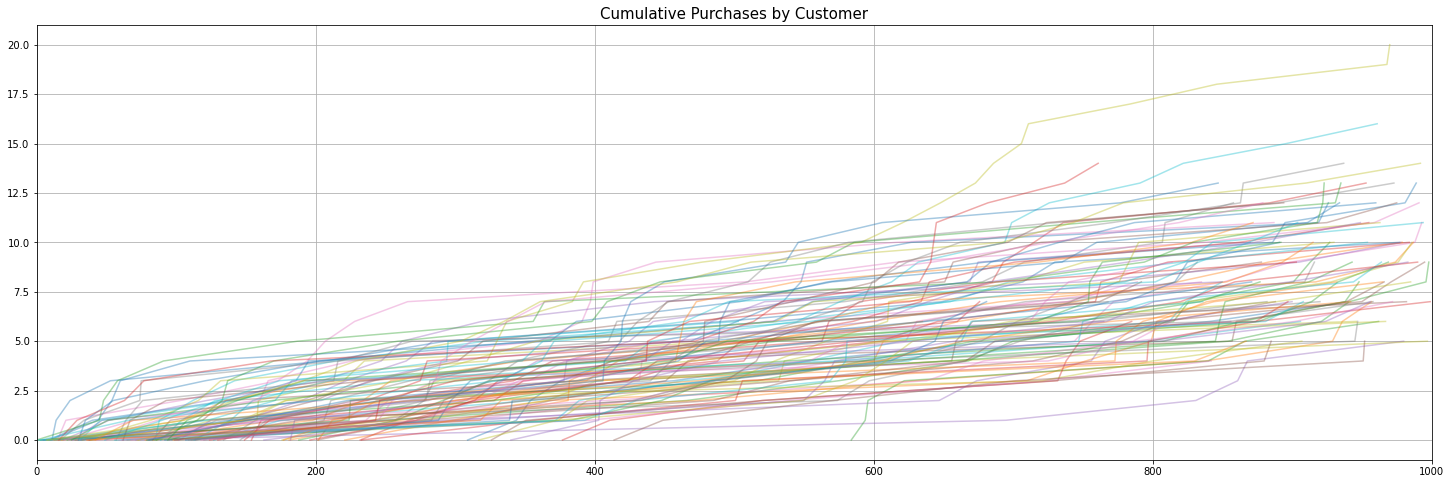

In [171]:
#=========== Visualize Results:
#=== Setup: 
fig = plt.figure(figsize=(25,8))
ax = plt.subplot()

#=== Plot based on customer ID:
_ = df.groupby(by='customer')['purchase'].plot(ax=ax,alpha=0.40)

#=== Formatting:
_ = ax.set_xlim((0,N_Samples))
ax.grid(True)
_ = ax.set_title('Cumulative Purchases by Customer',fontsize=15)